## Read Input

In [1]:
import cv2
import numpy as np

root_path = input() # '/Users/rachelsidney/Documents/university-of-tokyo/A1A2/remote-sensing-image-analysis/'

lr_red_path = f'{root_path}/input/lr_red.tif'
lr_green_path = f'{root_path}/input/lr_green.tif'
lr_blue_path = f'{root_path}/input/lr_blue.tif'
lr_nir_path = f'{root_path}/input/lr_nir.tif'

pan_path = f'{root_path}/input/pan.tif'

lr_red_img = cv2.imread(lr_red_path, -1)
lr_green_img = cv2.imread(lr_green_path, -1)
lr_blue_img = cv2.imread(lr_blue_path, -1)
lr_nir_img = cv2.imread(lr_nir_path, -1)

pan_img = cv2.imread(pan_path, -1)

lr_red_arr = np.asarray(lr_red_img)
lr_green_arr = np.asarray(lr_green_img)
lr_blue_arr = np.asarray(lr_blue_img)
lr_nir_arr = np.asarray(lr_nir_img)

pan_arr = np.asarray(pan_img)

print(f'lr_red_arr dimension: {lr_red_arr.shape}')
print(f'lr_green_arr dimension: {lr_green_arr.shape}')
print(f'lr_blue_arr dimension: {lr_blue_arr.shape}')
print(f'lr_nir_arr dimension: {lr_nir_arr.shape}')
print(f'pan_arr dimension: {pan_arr.shape}')

/Users/rachelsidney/Documents/university-of-tokyo/A1A2/remote-sensing-image-analysis/
lr_red_arr dimension: (300, 300)
lr_green_arr dimension: (300, 300)
lr_blue_arr dimension: (300, 300)
lr_nir_arr dimension: (300, 300)
pan_arr dimension: (1200, 1200)


## Show Input

lr_red_img:


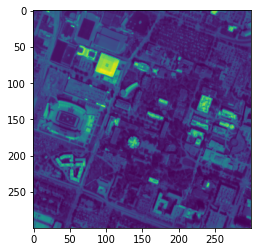

lr_green_img:


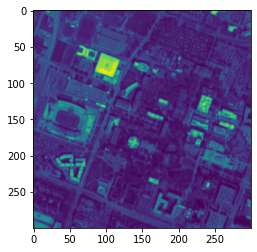

lr_blue_img:


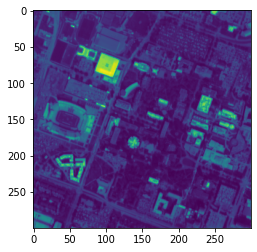

lr_nir_img:


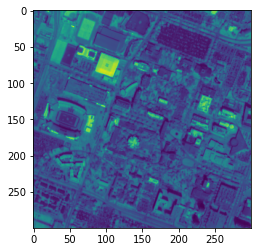

In [2]:
import matplotlib.pyplot as plt

print('lr_red_img:')
plt.imshow(lr_red_img)
plt.show()

print('lr_green_img:')
plt.imshow(lr_green_img)
plt.show()

print('lr_blue_img:')
plt.imshow(lr_blue_img)
plt.show()

print('lr_nir_img:')
plt.imshow(lr_nir_img)
plt.show()

## Upsampling

In [3]:
scale_x = pan_arr.shape[0] / lr_red_arr.shape[0]
scale_y = pan_arr.shape[1] / lr_red_arr.shape[1]

lr_red_upsampled_img = cv2.resize(lr_red_img, None, fx = scale_x, fy = scale_y, interpolation = cv2.INTER_CUBIC)
lr_green_upsampled_img = cv2.resize(lr_green_img, None, fx = scale_x, fy = scale_y, interpolation = cv2.INTER_CUBIC)
lr_blue_upsampled_img = cv2.resize(lr_blue_img, None, fx = scale_x, fy = scale_y, interpolation = cv2.INTER_CUBIC)
lr_nir_upsampled_img = cv2.resize(lr_nir_img, None, fx = scale_x, fy = scale_y, interpolation = cv2.INTER_CUBIC)

lr_red_upsampled_arr = np.asarray(lr_red_upsampled_img)
lr_green_upsampled_arr = np.asarray(lr_green_upsampled_img)
lr_blue_upsampled_arr = np.asarray(lr_blue_upsampled_img)
lr_nir_upsampled_arr = np.asarray(lr_nir_upsampled_img)

print(f'lr_red_upsampled_arr dimension: {lr_red_upsampled_arr.shape}')
print(f'lr_green_upsampled_arr dimension: {lr_green_upsampled_arr.shape}')
print(f'lr_blue_upsampled_arr dimension: {lr_blue_upsampled_arr.shape}')
print(f'lr_nir_upsampled_arr dimension: {lr_nir_upsampled_arr.shape}')

lr_red_upsampled_arr dimension: (1200, 1200)
lr_green_upsampled_arr dimension: (1200, 1200)
lr_blue_upsampled_arr dimension: (1200, 1200)
lr_nir_upsampled_arr dimension: (1200, 1200)


## Upsampling Result

lr_red_upsampled_img: 


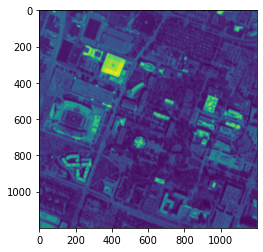

lr_green_upsampled_img: 


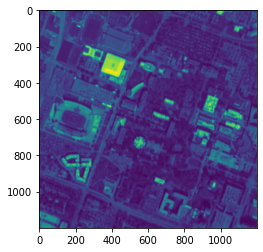

lr_blue_upsampled_img: 


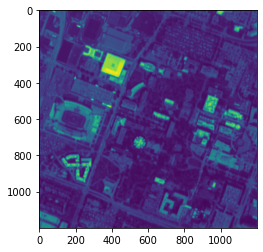

lr_nir_upsampled_img: 


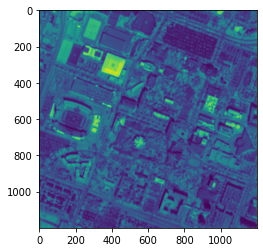

In [4]:
print('lr_red_upsampled_img: ')
plt.imshow(lr_red_upsampled_img)
plt.show()

print('lr_green_upsampled_img: ')
plt.imshow(lr_green_upsampled_img)
plt.show()

print('lr_blue_upsampled_img: ')
plt.imshow(lr_blue_upsampled_img)
plt.show()

print('lr_nir_upsampled_img: ')
plt.imshow(lr_nir_upsampled_img)
plt.show()

## Pan-sharpening using Brovey Algorithm

In [5]:
lr_red_upsampled_arr_float64 = lr_red_upsampled_arr.astype(np.float64)
lr_green_upsampled_arr_float64 = lr_green_upsampled_arr.astype(np.float64)
lr_blue_upsampled_arr_float64 = lr_blue_upsampled_arr.astype(np.float64)
lr_nir_upsampled_arr_float64 = lr_nir_upsampled_arr.astype(np.float64)
pan_arr_float64 = pan_arr.astype(np.float64)

multispectral_sum_float64 = lr_red_upsampled_arr_float64 + lr_green_upsampled_arr_float64 + lr_blue_upsampled_arr_float64 + lr_nir_upsampled_arr_float64
ratio = np.true_divide(pan_arr_float64, multispectral_sum_float64)

red_arr_float64 = np.multiply(ratio, lr_red_upsampled_arr)
green_arr_float64 = np.multiply(ratio, lr_green_upsampled_arr)
blue_arr_float64 = np.multiply(ratio, lr_blue_upsampled_arr)
nir_arr_float64 = np.multiply(ratio, lr_nir_upsampled_arr)

red_arr_uint16 = np.clip(red_arr_float64, 0, np.iinfo(np.uint16).max).astype(np.uint16)
green_arr_uint16 = np.clip(green_arr_float64, 0, np.iinfo(np.uint16).max).astype(np.uint16)
blue_arr_uint16 = np.clip(blue_arr_float64, 0, np.iinfo(np.uint16).max).astype(np.uint16)
nir_arr_uint16 = np.clip(nir_arr_float64, 0, np.iinfo(np.uint16).max).astype(np.uint16)

## Pan-sharpening Result

red_arr_uint16: 


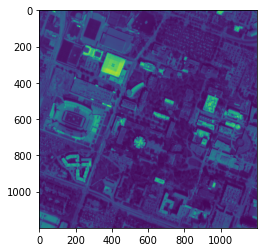

green_arr_uint16: 


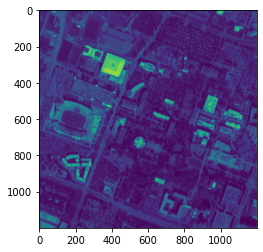

blue_arr_uint16: 


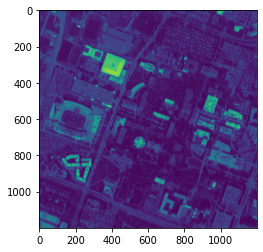

nir_arr_uint16: 


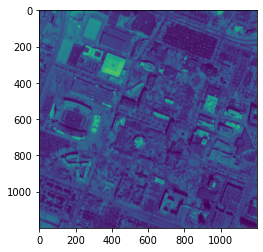

In [6]:
import matplotlib.pyplot as plt

print('red_arr_uint16: ')
plt.imshow(red_arr_uint16)
plt.show()

print('green_arr_uint16: ')
plt.imshow(green_arr_uint16)
plt.show()

print('blue_arr_uint16: ')
plt.imshow(blue_arr_uint16)
plt.show()

print('nir_arr_uint16: ')
plt.imshow(nir_arr_uint16)
plt.show()

## Write Result

In [7]:
import zipfile

cv2.imwrite('output/red.tif', red_arr_uint16)
cv2.imwrite('output/green.tif', green_arr_uint16)
cv2.imwrite('output/blue.tif', blue_arr_uint16)
cv2.imwrite('output/nir.tif', nir_arr_uint16)

with zipfile.ZipFile(f'{root_path}/output/result.zip', 'w', compression = zipfile.ZIP_DEFLATED) as new_zip:
    new_zip.write('output/red.tif', 'red.tif')
    new_zip.write('output/green.tif', 'green.tif')
    new_zip.write('output/blue.tif', 'blue.tif')
    new_zip.write('output/nir.tif', 'nir.tif')